# **OLIST DATA ANALYSIS**
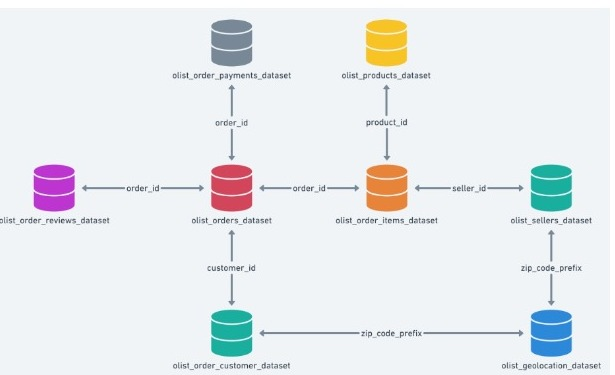
# CASE OBJECTIVES
## 1. CUSTOMER GROWTH
- Customer Growth (Last 3 Year)
- Percentage of Customer Growth per Year
- Country with Highest and Lowest Customer Growth (Last 3 Year and per Year)
- City with Highest and Lowest Customer Growth (Last 3 Year)


## 2. TYPE OF CUSTOMER PAYMENTS
- Type of Customer Payments (Frequently and Rarely) 
- Countries with Frequently Customer Payments
- Countries with Rarest Customer Payments
- Distribution of Payments Method

## 3. CUSTOMER TRANSACTION HABBIT
- Transaction Time 
- How Long Customer Do a Transaction between Purchasing Session and Approval of Purchasing Session
- Comparison of Payments Time Average (Transaction Type)

# **DATASET**

In [ ]:
# IMPORT LIBRARY
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, sqlite3
from google.colab import drive

In [ ]:
# OLIST DATABASE 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CONNECT TO OLIST DATABASE
con = sqlite3.connect("/content/drive/MyDrive/FINAL PROJECT DATA WRANGLING & SQL/olist.db")

In [ ]:
# VARIABLE DECLARATION
customer =  pd.read_sql("SELECT * FROM olist_order_customer_dataset", con)
order =  pd.read_sql("SELECT * FROM olist_order_dataset", con)
payment =  pd.read_sql("SELECT * FROM olist_order_payments_dataset", con)

In [ ]:
# CUSTOMER TABLE
customer.head()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# ORDER TABLE
order.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# PAYMENT TABLE
payment.head()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**COLUMNS**:
- **order_purchase_timestamp**: Customer Purchasing Time
- **order_approved_at**: Approved Customer Purchasing Time
- **customer_state**: Customer's Country
- **customer_city**: Customer's City
- **payment_type**: Customer's Payment Type
- **payment_value**: Customer's Payment Value
- **payment_installment**: Customer's Total of Payment Installment

In [ ]:
# QUERY
query = """
SELECT 
  order_purchase_timestamp,
  order_approved_at,
  customer_state,
  customer_city,
  payment_type,
  payment_value,
  payment_installments
FROM (SELECT order_id, customer_state, customer_city, order_purchase_timestamp, order_approved_at
      FROM olist_order_customer_dataset
      JOIN olist_order_dataset
      ON olist_order_customer_dataset.customer_id = olist_order_dataset.customer_id) customer_order
JOIN olist_order_payments_dataset
  ON  customer_order.order_id = olist_order_payments_dataset.order_id
"""

# Mengakses data customer
dataset = pd.read_sql(query, con)
dataset.head()

,order_purchase_timestamp,order_approved_at,customer_state,customer_city,payment_type,payment_value,payment_installments
0,2017-05-16 15:05:35,2017-05-16 15:22:12,SP,franca,credit_card,146.87,2
1,2018-01-12 20:48:24,2018-01-12 20:58:32,SP,sao bernardo do campo,credit_card,335.48,8
2,2018-05-19 16:07:45,2018-05-20 16:19:10,SP,sao paulo,credit_card,157.73,7
3,2018-03-13 16:06:38,2018-03-13 17:29:19,SP,mogi das cruzes,credit_card,173.30,1
4,2018-07-29 09:51:30,2018-07-29 10:10:09,SP,campinas,credit_card,252.25,8


# **DATA EXPLORATION**

In [ ]:
# TOP 5 DATA FROM DATASET
dataset.head()

,order_purchase_timestamp,order_approved_at,customer_state,customer_city,payment_type,payment_value,payment_installments
0,2017-05-16 15:05:35,2017-05-16 15:22:12,SP,franca,credit_card,146.87,2
1,2018-01-12 20:48:24,2018-01-12 20:58:32,SP,sao bernardo do campo,credit_card,335.48,8
2,2018-05-19 16:07:45,2018-05-20 16:19:10,SP,sao paulo,credit_card,157.73,7
3,2018-03-13 16:06:38,2018-03-13 17:29:19,SP,mogi das cruzes,credit_card,173.30,1
4,2018-07-29 09:51:30,2018-07-29 10:10:09,SP,campinas,credit_card,252.25,8


In [ ]:
# DATASIZE EXTRACT
nrows, ncols = dataset.shape

print(f"Data Input : ({nrows}, {ncols}) - (#jumlah percobaan hasil penelitian, #jumlah fitur)")

Data Input : (103886, 7) - (#jumlah percobaan hasil penelitian, #jumlah fitur)


In [ ]:
# DATA INFO
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_purchase_timestamp  103886 non-null  object 
 1   order_approved_at         103711 non-null  object 
 2   customer_state            103886 non-null  object 
 3   customer_city             103886 non-null  object 
 4   payment_type              103886 non-null  object 
 5   payment_value             103886 non-null  float64
 6   payment_installments      103886 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 5.5+ MB


***POINT***
- Ada 103,886 hasil percobaan pengamatan
- Terdapat 7 kolom
- Terdapat beberapa fitur bertipe object, float64 dan int64 namun terdapat beberapa fitur yaitu order_purchase_timestamp dan order_approved_at yang bertipe object dimana seharusnya bertipe datetime, diperlukan beberapa revisi terhadap kesalahan tersebut.

In [ ]:
# MISSING VALUE
dataset.isnull().sum()

order_purchase_timestamp      0
order_approved_at           175
customer_state                0
customer_city                 0
payment_type                  0
payment_value                 0
payment_installments          0
dtype: int64

***POINT***
- Terdapat 1 dari 7 kolom yang memiliki permasalahan missing value
  - Pada dataset ini missing value berada pada kolom tanggal, sehingga digunakan method drop untuk mengatasi permasalahan tersebut

In [ ]:
# HANDLING MISSING VALUE
dataset.dropna(axis=0, inplace=True)
dataset

,order_purchase_timestamp,order_approved_at,customer_state,customer_city,payment_type,payment_value,payment_installments
0,2017-05-16 15:05:35,2017-05-16 15:22:12,SP,franca,credit_card,146.87,2
1,2018-01-12 20:48:24,2018-01-12 20:58:32,SP,sao bernardo do campo,credit_card,335.48,8
2,2018-05-19 16:07:45,2018-05-20 16:19:10,SP,sao paulo,credit_card,157.73,7
3,2018-03-13 16:06:38,2018-03-13 17:29:19,SP,mogi das cruzes,credit_card,173.30,1
4,2018-07-29 09:51:30,2018-07-29 10:10:09,SP,campinas,credit_card,252.25,8
...,...,...,...,...,...,...,...
103881,2018-04-07 15:48:17,2018-04-07 16:08:45,SP,sao paulo,credit_card,88.78,6
103882,2018-04-04 08:20:22,2018-04-04 08:35:12,SP,taboao da serra,credit_card,129.06,3
103883,2018-04-08 20:11:50,2018-04-08 20:30:03,CE,fortaleza,credit_card,56.04,5
103884,2017-11-03 21:08:33,2017-11-03 21:31:20,RS,canoas,credit_card,711.07,2


In [ ]:
# RECHECK MISSING VALUE
dataset.isnull().sum()

order_purchase_timestamp    0
order_approved_at           0
customer_state              0
customer_city               0
payment_type                0
payment_value               0
payment_installments        0
dtype: int64

Hasil dari Handling Missing Value dari data tersebut mengalami pembersihan dari 103,886 menjadi 103,711

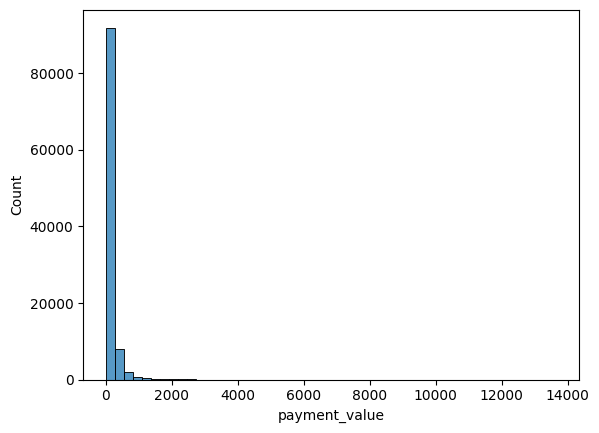

In [ ]:
# OUTLIER CHECK WITH HISTOGRAM
sns.histplot(data=dataset,x="payment_value", bins=50);

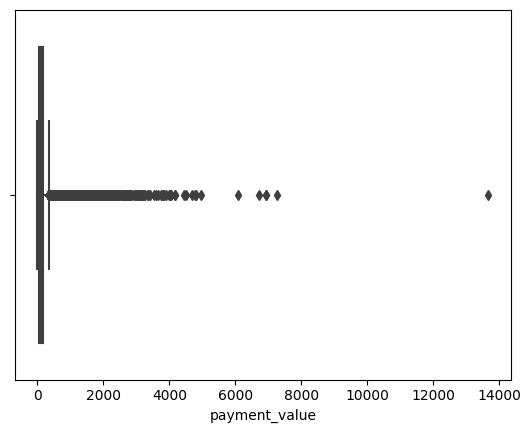

In [ ]:
# OUTLIER CHECK WITH BOXPLOT
sns.boxplot(data=dataset,x="payment_value");

Dari beberapa visualisasi yang dilakukan terlihat outlier pada kolom payment. Outlier tersebut merupakan hasil pengamatan yang sebenarnya kita gunakan metode capping untuk mengatasi permasalahan tersebut untuk tidak merubah data secara keseluruhan.

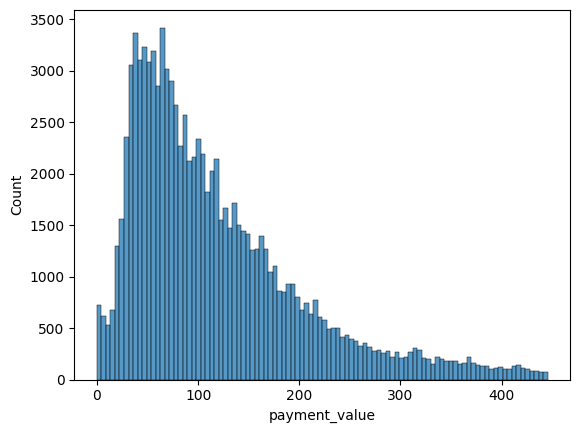

In [ ]:
# HANDLING OUTLIER
# batas atas data
batas_atas = dataset["payment_value"].quantile(q=0.9) * 1.5

# plot tanpa outlier
dataset_without_outlier = dataset[dataset["payment_value"] < batas_atas]

# plot kolom SQ_FT tanpa extreme outlier
sns.histplot(dataset_without_outlier["payment_value"]);

In [ ]:
# DUPLICATE DATA CHECK
dataset_without_outlier[dataset_without_outlier.duplicated(keep=False)]

,order_purchase_timestamp,order_approved_at,customer_state,customer_city,payment_type,payment_value,payment_installments
312,2017-11-26 15:11:19,2017-11-26 15:17:28,SP,sao paulo,voucher,189.88,1
313,2017-11-26 15:11:19,2017-11-26 15:17:28,SP,sao paulo,voucher,189.88,1
539,2018-04-04 19:21:32,2018-04-04 19:35:19,MS,rio brilhante,voucher,20.00,1
540,2018-04-04 19:21:32,2018-04-04 19:35:19,MS,rio brilhante,voucher,20.00,1
541,2018-04-04 19:21:32,2018-04-04 19:35:19,MS,rio brilhante,voucher,20.00,1
...,...,...,...,...,...,...,...
103659,2017-09-05 09:29:17,2017-09-06 19:43:28,SP,jundiai,voucher,83.59,1
103660,2017-09-05 09:29:17,2017-09-06 19:43:28,SP,jundiai,voucher,83.59,1
103661,2017-09-05 09:29:17,2017-09-06 19:43:28,SP,jundiai,voucher,83.59,1
103789,2017-07-12 15:40:39,2017-07-12 15:55:10,SP,caraguatatuba,voucher,7.30,1


In [ ]:
# HANDLING DUPLICATE DATA
dataset_clean = dataset_without_outlier.drop_duplicates(keep='first')
dataset_clean

,order_purchase_timestamp,order_approved_at,customer_state,customer_city,payment_type,payment_value,payment_installments
0,2017-05-16 15:05:35,2017-05-16 15:22:12,SP,franca,credit_card,146.87,2
1,2018-01-12 20:48:24,2018-01-12 20:58:32,SP,sao bernardo do campo,credit_card,335.48,8
2,2018-05-19 16:07:45,2018-05-20 16:19:10,SP,sao paulo,credit_card,157.73,7
3,2018-03-13 16:06:38,2018-03-13 17:29:19,SP,mogi das cruzes,credit_card,173.30,1
4,2018-07-29 09:51:30,2018-07-29 10:10:09,SP,campinas,credit_card,252.25,8
...,...,...,...,...,...,...,...
103880,2017-12-17 23:13:41,2017-12-18 00:17:27,MG,divinopolis,credit_card,75.88,1
103881,2018-04-07 15:48:17,2018-04-07 16:08:45,SP,sao paulo,credit_card,88.78,6
103882,2018-04-04 08:20:22,2018-04-04 08:35:12,SP,taboao da serra,credit_card,129.06,3
103883,2018-04-08 20:11:50,2018-04-08 20:30:03,CE,fortaleza,credit_card,56.04,5


In [ ]:
# CHANGE DATATYPE
dataset_clean['order_purchase_timestamp'] = pd.to_datetime(dataset_clean['order_purchase_timestamp'], dayfirst=True) 
dataset_clean['order_approved_at'] = pd.to_datetime(dataset_clean['order_approved_at'], dayfirst=True) 

<ipython-input-96-b9e60c17948f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['order_purchase_timestamp'] = pd.to_datetime(dataset_clean['order_purchase_timestamp'], dayfirst=True)
<ipython-input-96-b9e60c17948f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['order_approved_at'] = pd.to_datetime(dataset_clean['order_approved_at'], dayfirst=True)


In [ ]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98062 entries, 0 to 103885
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_purchase_timestamp  98062 non-null  datetime64[ns]
 1   order_approved_at         98062 non-null  datetime64[ns]
 2   customer_state            98062 non-null  object        
 3   customer_city             98062 non-null  object        
 4   payment_type              98062 non-null  object        
 5   payment_value             98062 non-null  float64       
 6   payment_installments      98062 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
# NEW CUSTOMER GROWTH DATAFRAME
jumlah_customer = pd.DataFrame({'2016' : dataset_clean[dataset_clean['order_purchase_timestamp'] < '2017-01-01'].count(),
                                '2017' : dataset_clean[dataset_clean['order_purchase_timestamp'] < '2018-01-01'].count(),
                                '2018' : dataset_clean[dataset_clean['order_purchase_timestamp'] >= '2018-01-01'].count()
})

jumlah_customer = pd.DataFrame(jumlah_customer.iloc[0,:])
jumlah_customer

,order_purchase_timestamp
2016,311
2017,45165
2018,52897


In [ ]:
# DECLARE NEW COLUMN
dataset_clean['YEAR'] = dataset_clean['order_purchase_timestamp'].dt.strftime('%Y') # YEAR COLUMN 
dataset_clean['MONTH'] = dataset_clean['order_purchase_timestamp'].dt.strftime('%m') # MONTH COLUMN
dataset_clean['DAY'] = dataset_clean['order_purchase_timestamp'].dt.strftime('%d') # DAY COLUMN
dataset_clean['HOUR'] = dataset_clean['order_purchase_timestamp'].dt.strftime('%H') # HOUR COLUMN

# DATA RESULT
dataset_clean.head()

,order_purchase_timestamp,order_approved_at,customer_state,customer_city,payment_type,payment_value,payment_installments,YEAR,MONTH,DAY,HOUR
0,2017-05-16 15:05:35,2017-05-16 15:22:12,SP,franca,credit_card,146.87,2,2017,05,16,15
1,2018-01-12 20:48:24,2018-01-12 20:58:32,SP,sao bernardo do campo,credit_card,335.48,8,2018,01,12,20
2,2018-05-19 16:07:45,2018-05-20 16:19:10,SP,sao paulo,credit_card,157.73,7,2018,05,19,16
3,2018-03-13 16:06:38,2018-03-13 17:29:19,SP,mogi das cruzes,credit_card,173.30,1,2018,03,13,16
4,2018-07-29 09:51:30,2018-07-29 10:10:09,SP,campinas,credit_card,252.25,8,2018,07,29,09


In [ ]:
# DECLARE SOME VARIABLE 
customer_tertinggi = dataset_clean.groupby(['YEAR','customer_state'])['order_purchase_timestamp'].count().reset_index() # Melakukan groupby pada dataset berdasarkan tahun dan customer_state
customer_tertinggi = customer_tertinggi.rename(columns = {'order_purchase_timestamp':'jumlah_customer'}) # Mengubah nama kolom order_purchase_timestamp menjadi jumlah_customer
cust_2016 = customer_tertinggi[customer_tertinggi['YEAR']=='2016'].sort_values('jumlah_customer', ascending=False) # Melakukan filtering terhadap data customer dengan tahun 2016
cust_2017 = customer_tertinggi[customer_tertinggi['YEAR']=='2017'].sort_values('jumlah_customer', ascending=False) # Melakukan filtering terhadap data customer dengan tahun 2017
cust_2018 = customer_tertinggi[customer_tertinggi['YEAR']=='2018'].sort_values('jumlah_customer', ascending=False) # Melakukan filtering terhadap data customer dengan tahun 2018

customer_tertinggi2 = dataset_clean.groupby(['YEAR','customer_city'])['order_purchase_timestamp'].count().reset_index() # Melakukan groupby pada dataset berdasarkan tahun dan customer_city
customer_tertinggi2 = customer_tertinggi2.rename(columns = {'order_purchase_timestamp':'jumlah_customer'}) # Mengubah nama kolom order_purchase_timestamp menjadi jumlah_customer
cust2_2016 = customer_tertinggi2[customer_tertinggi2['YEAR']=='2016'].sort_values('jumlah_customer', ascending=False) # Melakukan filtering terhadap data customer dengan tahun 2016
cust2_2017 = customer_tertinggi2[customer_tertinggi2['YEAR']=='2017'].sort_values('jumlah_customer', ascending=False) # Melakukan filtering terhadap data customer dengan tahun 2017
cust2_2018 = customer_tertinggi2[customer_tertinggi2['YEAR']=='2018'].sort_values('jumlah_customer', ascending=False) # Melakukan filtering terhadap data customer dengan tahun 2018

credit = dataset_clean[dataset_clean['payment_type']=='credit_card'] # Melakukan filtering terhadap tipe pembayaran credit card
debit = dataset_clean[dataset_clean['payment_type']=='debit_card'] # Melakukan filtering terhadap tipe pembayaran debit card
boleto = dataset_clean[dataset_clean['payment_type']=='boleto'] # Melakukan filtering terhadap tipe pembayaran boleto
voucher = dataset_clean[dataset_clean['payment_type']=='voucher'] # Melakukan filtering terhadap tipe pembayaran voucher

jam = dataset_clean.pivot_table(values="customer_state", index=["HOUR"], columns=["YEAR"],aggfunc='count', fill_value=0) # Membuat vipot table untuk jam
hari = dataset_clean.pivot_table(values="customer_state", index=["DAY"], columns=["YEAR"],aggfunc='count', fill_value=0) # Membuat vipot table untuk hari
bulan = dataset_clean.pivot_table(values="customer_state", index=["MONTH"], columns=["YEAR"],aggfunc='count', fill_value=0) # Membuat vipot table untuk bulan

# **DATA ANALYSIS**


## CUSTOMER GROWTH
### 1. Customer Growth (Last 3 Year)


      order_purchase_timestamp
2016                       311
2017                     45165
2018                     52897


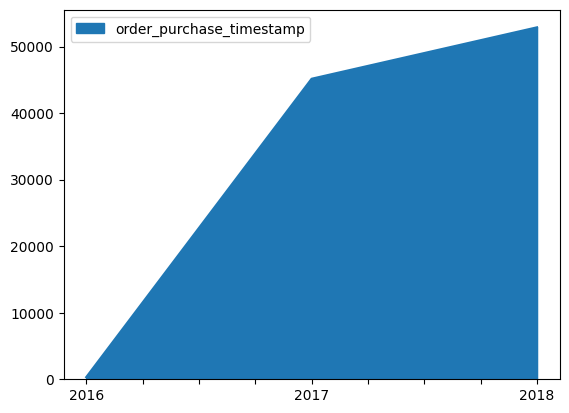

In [ ]:
# AREA PLOT
jumlah_customer.plot(kind='area');

# RESULT
print(jumlah_customer)

### 2. Percentage of Customer Growth per Year

In [ ]:
def persentase_pertumbuhan():
  # JUMLAH CUSTOMER PER TAHN
  pertumbuhan_2016 = 311
  pertumbuhan_2017 = 45165
  pertumbuhan_2018 = 52897

  # PERSENTASE PERTUMBUHAN CUSTOMER 2016 - 2017
  persentase_2016_2017 = np.round(((pertumbuhan_2017-pertumbuhan_2016)/pertumbuhan_2017)*100, 2)
  print(f'Persentase pertumbuhan customer dari tahun 2016 ke tahun 2017 sebesar {persentase_2016_2017}%')

  # PERSENTASE PERTUMBUHAN CUSTOMER 2017 - 2018
  persentase_2017_2018 = np.round(((pertumbuhan_2018-pertumbuhan_2017)/pertumbuhan_2018)*100,2)
  print(f'Persentase pertumbuhan customer dari tahun 2017 ke tahun 2018 sebesar {persentase_2017_2018}%')

# RESULT
persentase_pertumbuhan()

Persentase pertumbuhan customer dari tahun 2016 ke tahun 2017 sebesar 99.31%
Persentase pertumbuhan customer dari tahun 2017 ke tahun 2018 sebesar 14.62%


### 3. Country with Highest and Lowest Customer Growth Last 3 Year and per Year

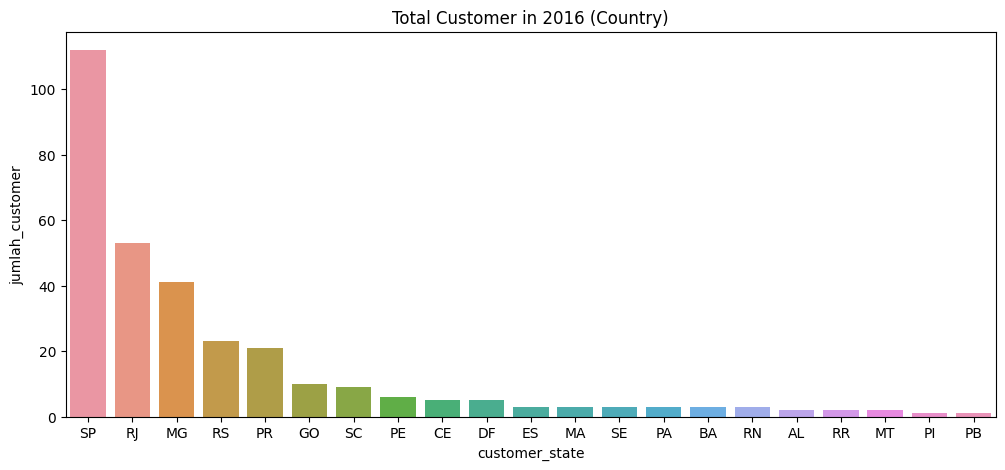

   customer_state  jumlah_customer
0              SP              112
1              RJ               53
2              MG               41
3              RS               23
4              PR               21
5              GO               10
6              SC                9
7              PE                6
8              CE                5
9              DF                5
10             ES                3
11             MA                3
12             SE                3
13             PA                3
14             BA                3
15             RN                3
16             AL                2
17             RR                2
18             MT                2
19             PI                1
20             PB                1


In [ ]:
# DECLARE FIGURE
plt.figure(figsize=(12,5))

# BARPLOT VISUALIZATION
sns.barplot(data=cust_2016, 
            x='customer_state', 
            y='jumlah_customer')

# ADDING TITLE
plt.title('Total Customer in 2016 (Country)')

# RESULT
plt.show()

# VALUE RESULT
print(cust_2016[['customer_state','jumlah_customer']].reset_index(drop=True))

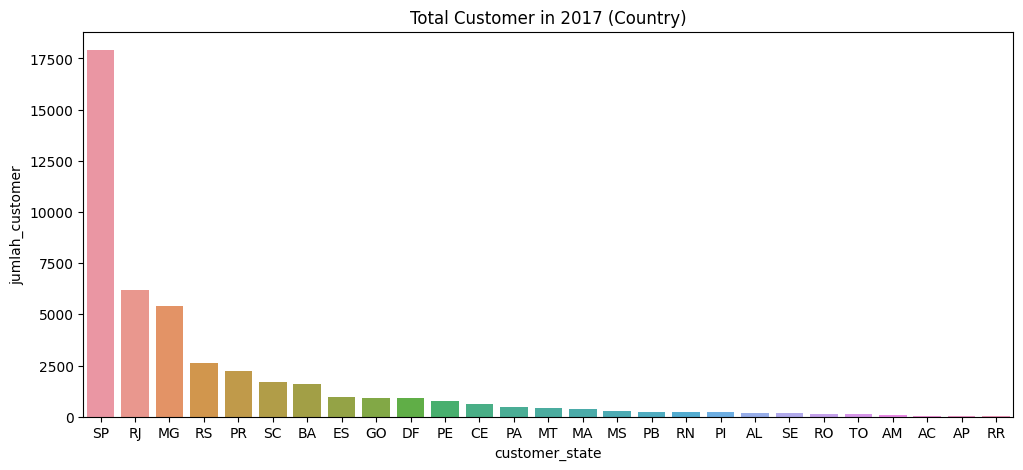

   customer_state  jumlah_customer
0              SP            17907
1              RJ             6199
2              MG             5388
3              RS             2627
4              PR             2238
5              SC             1686
6              BA             1584
7              ES              972
8              GO              930
9              DF              904
10             PE              749
11             CE              630
12             PA              480
13             MT              410
14             MA              366
15             MS              292
16             PB              240
17             RN              233
18             PI              222
19             AL              191
20             SE              176
21             RO              133
22             TO              129
23             AM               73
24             AC               49
25             AP               28
26             RR               18


In [ ]:
# DECLARE FIGURE 
plt.figure(figsize=(12,5))

# BARPLOT VISUALIZATION
sns.barplot(data=cust_2017, 
            x='customer_state', 
            y='jumlah_customer')

# ADDING TITLE
plt.title('Total Customer in 2017 (Country)')

# RESULT
plt.show()

# VALUE RESULT
print(cust_2017[['customer_state','jumlah_customer']].reset_index(drop=True))

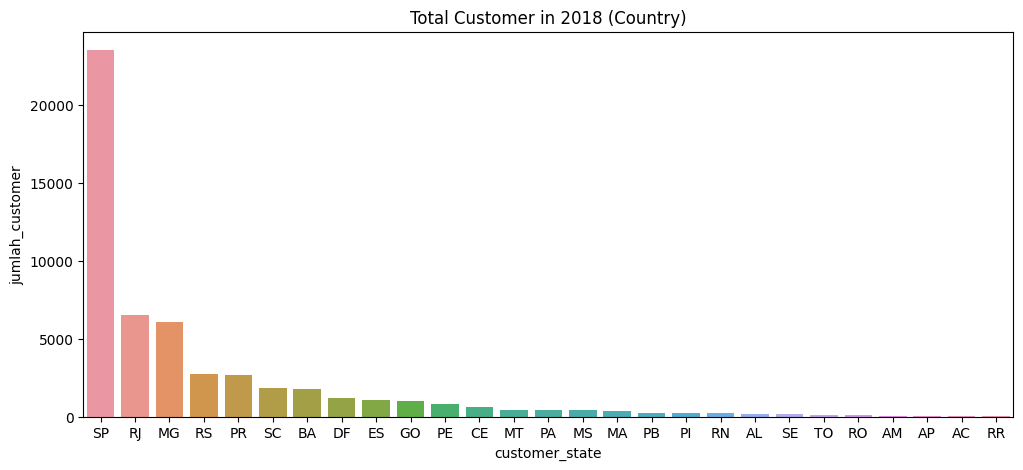

   customer_state  jumlah_customer
0              SP            23503
1              RJ             6535
2              MG             6046
3              RS             2712
4              PR             2706
5              SC             1845
6              BA             1753
7              DF             1171
8              ES             1040
9              GO             1028
10             PE              836
11             CE              633
12             MT              459
13             PA              431
14             MS              402
15             MA              338
16             PB              252
17             PI              250
18             RN              231
19             AL              188
20             SE              148
21             TO              138
22             RO              105
23             AM               68
24             AP               36
25             AC               23
26             RR               20


In [ ]:
# DECLARE FIGURE
plt.figure(figsize=(12,5))

# BARPLOT VISUALIZATION
sns.barplot(data=cust_2018, 
            x='customer_state', 
            y='jumlah_customer')

# ADDING TITLE
plt.title('Total Customer in 2018 (Country)')

# RESULT
plt.show()

# VALUE RESULT
print(cust_2018[['customer_state','jumlah_customer']].reset_index(drop=True))

### 4. City with Highest and Lowest Customer Growth (Last 3 Year)

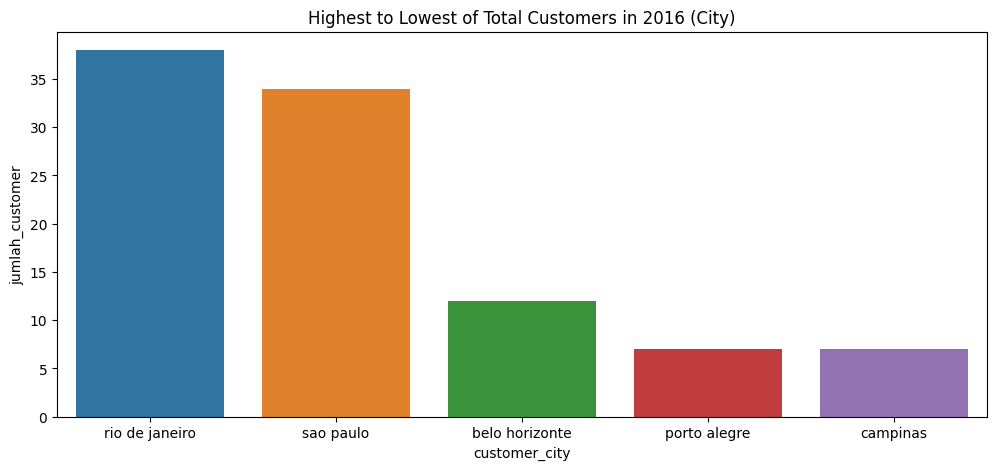

    customer_city  jumlah_customer
0  rio de janeiro               38
1       sao paulo               34
2  belo horizonte               12
3    porto alegre                7
4        campinas                7


In [ ]:
# DECLARE FIGURE
plt.figure(figsize=(12,5))

# BARPLOT VISUALIZATION
sns.barplot(data=cust2_2016.head(), 
            x='customer_city', 
            y='jumlah_customer')

# ADDING TITLE
plt.title('Highest to Lowest of Total Customers in 2016 (City)')

# RESULT
plt.show()

# VALUE RESULT
print(cust2_2016[['customer_city','jumlah_customer']].head().reset_index(drop=True))

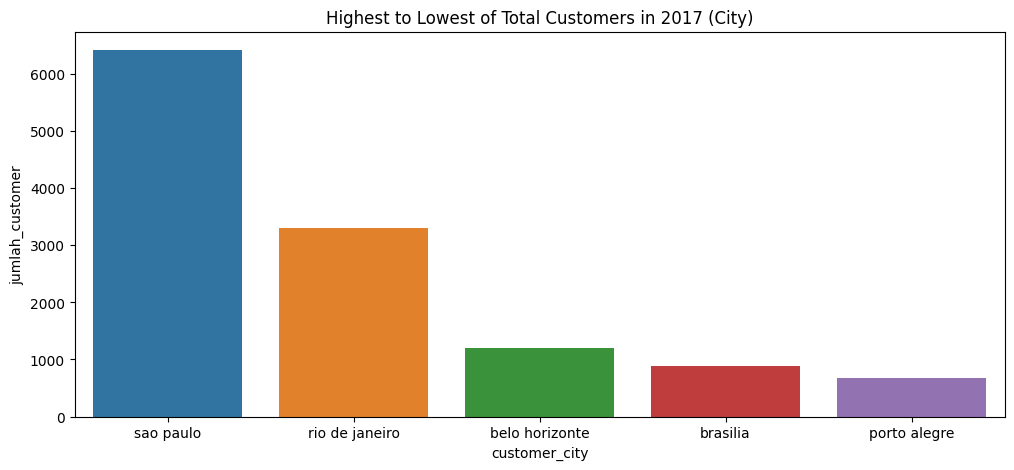

    customer_city  jumlah_customer
0       sao paulo             6417
1  rio de janeiro             3303
2  belo horizonte             1195
3        brasilia              893
4    porto alegre              675


In [ ]:
# DECLARE FIGURE
plt.figure(figsize=(12,5))

# BARPLOT VISUALIZATION
sns.barplot(data=cust2_2017.head(), 
            x='customer_city', 
            y='jumlah_customer')

# ADDING TITLE
plt.title('Highest to Lowest of Total Customers in 2017 (City)')

# RESULT
plt.show()

# VALUE RESULT
print(cust2_2017[['customer_city','jumlah_customer']].head().reset_index(drop=True))

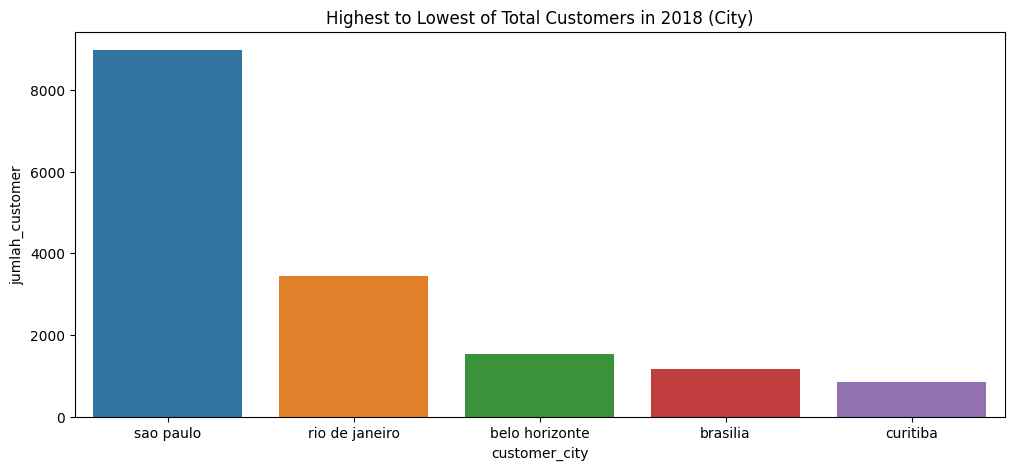

    customer_city  jumlah_customer
0       sao paulo             8978
1  rio de janeiro             3443
2  belo horizonte             1529
3        brasilia             1171
4        curitiba              839


In [ ]:
# DECLARE FIGURE
plt.figure(figsize=(12,5))

# BARPLOT VISUALIZATION
sns.barplot(data=cust2_2018.head(), 
            x='customer_city', 
            y='jumlah_customer')

# ADDING TITLE
plt.title('Highest to Lowest of Total Customers in 2018 (City)')

# RESULT
plt.show()

# VALUE RESULT
print(cust2_2018[['customer_city','jumlah_customer']].head().reset_index(drop=True))

## **TYPE OF CUSTOMER PAYMENTS**
### 1. Type of Customer Payments (Frequently and Rarely)

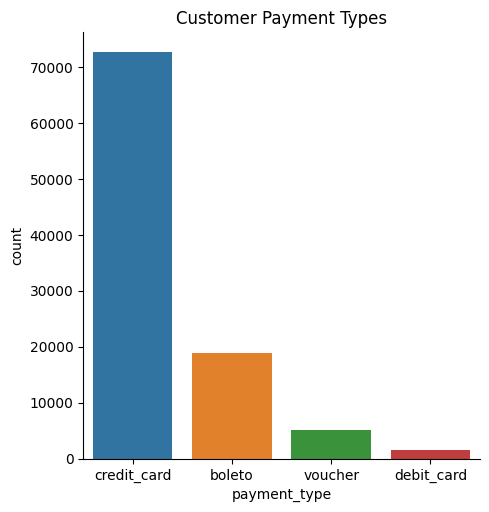

In [ ]:
# CATEGORICAL DATA
category_order = ['credit_card', 'boleto', 'voucher', 'debit_card']

# COUNTPLOT VISUALIZATION
sns.catplot(x='payment_type', data=dataset_clean, kind='count', order=category_order)

# ADDING TITLE
plt.title('Customer Payment Types');

### 2. Countries with Frequently Customer Payments (Credit Card)


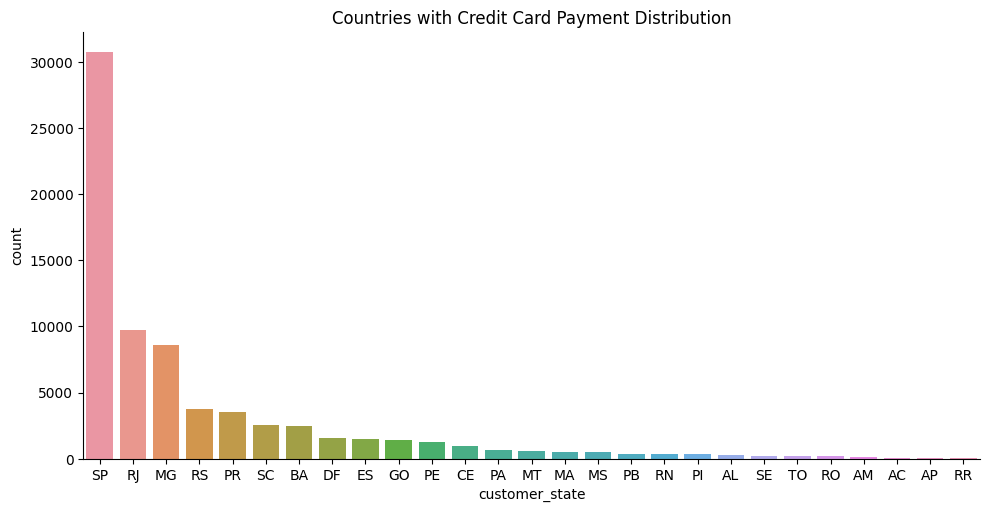

In [ ]:
# COUNTPLOT VISUALIZATION
sns.catplot(x='customer_state', data=credit, kind='count', order=credit['customer_state'].value_counts().index, aspect=2 )

# ADDING TITLE
plt.title('Countries with Credit Card Payment Distribution');

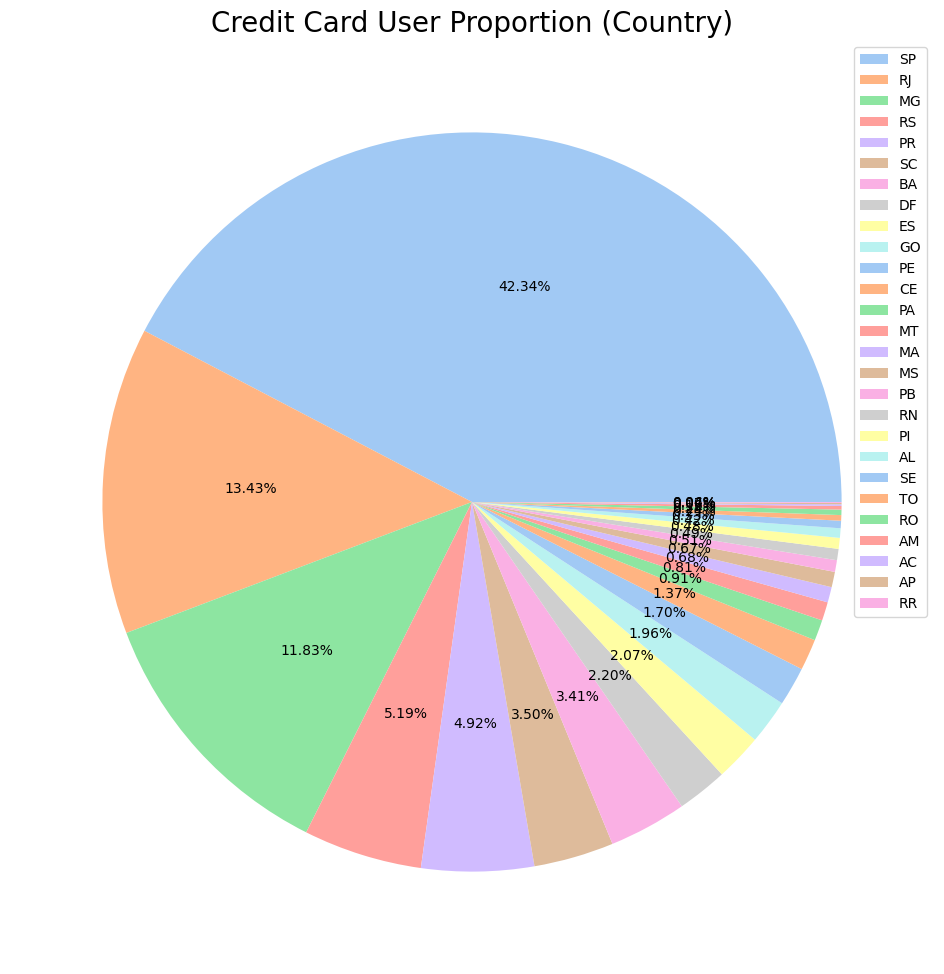

In [ ]:
# DECLARE FIGURE
plt.figure(figsize=(12,12))

# DECLARE DATA AND KEYS
data = credit['customer_state'].value_counts()/len(credit['customer_state'])
keys = credit['customer_state'].value_counts().index

# PALETTE COLOR
palette_color = sns.color_palette('pastel')

# ADDING TITLE
plt.title('Credit Card User Proportion (Country)', fontsize=20)

# PIE CHART VISUALIZATION
plt.pie(data, colors=palette_color,
         autopct='%.2f%%', textprops={'fontsize': 10})

# ADDING LEGEND
plt.legend(labels=keys);

### 3. Countries with Frequently Customer Payments (Debit Card)


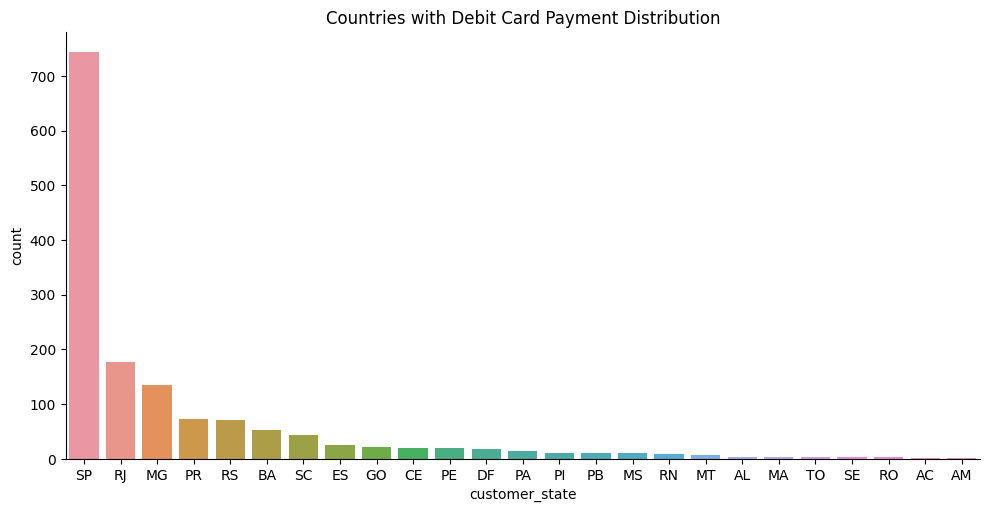

In [ ]:
# COUNTPLOT VISUALIZATION
sns.catplot(x='customer_state', data=debit, kind='count', order=debit['customer_state'].value_counts().index, aspect=2 )

# ADDING TITLE
plt.title('Countries with Debit Card Payment Distribution');

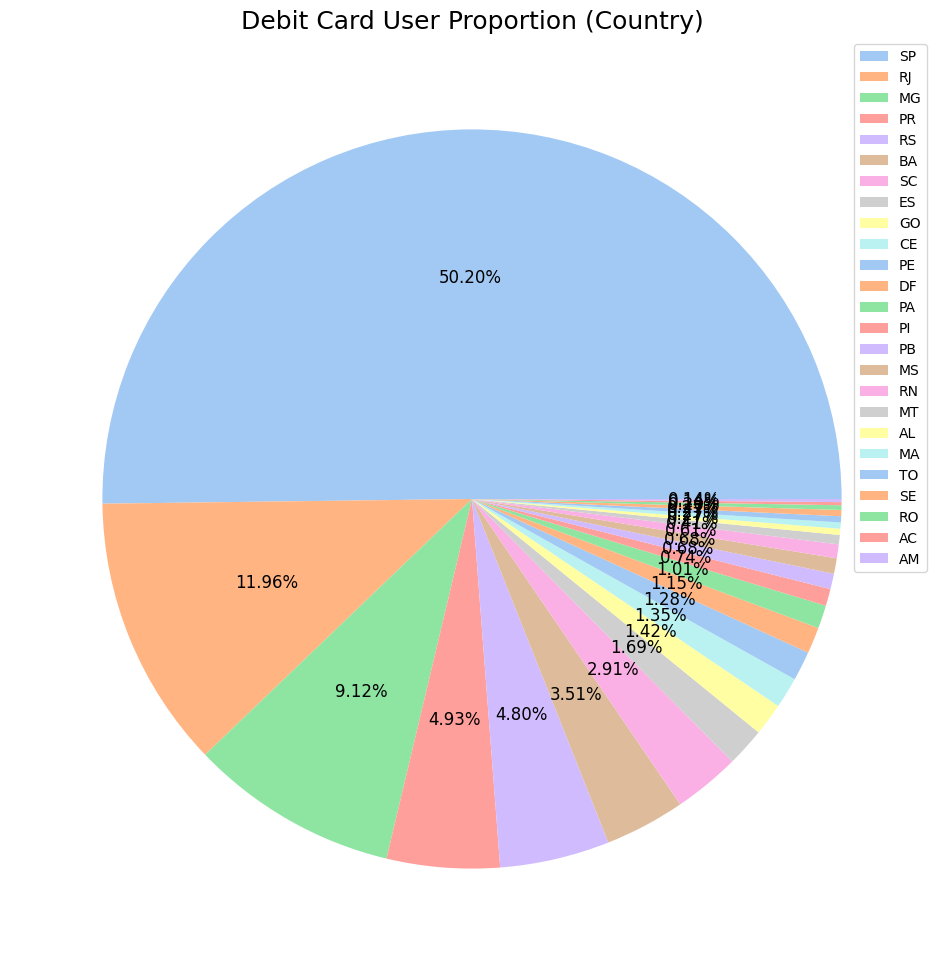

In [ ]:
# DECLARE FIGURE
plt.figure(figsize=(12,12))

# DECLARE DATA & KEYS
data = debit['customer_state'].value_counts()/len(debit['customer_state'])
keys = debit['customer_state'].value_counts().index

# COLOR PALLETE
palette_color = sns.color_palette('pastel')

# ADDING TITLE
plt.title('Debit Card User Proportion (Country)', fontsize=18)

# PIE CHART VISUALIZATION
plt.pie(data, colors=palette_color,
         autopct='%.2f%%', textprops={'fontsize': 12})

# ADDING LEGEND
plt.legend(labels=keys);

### 4. Distribution of Payment Method


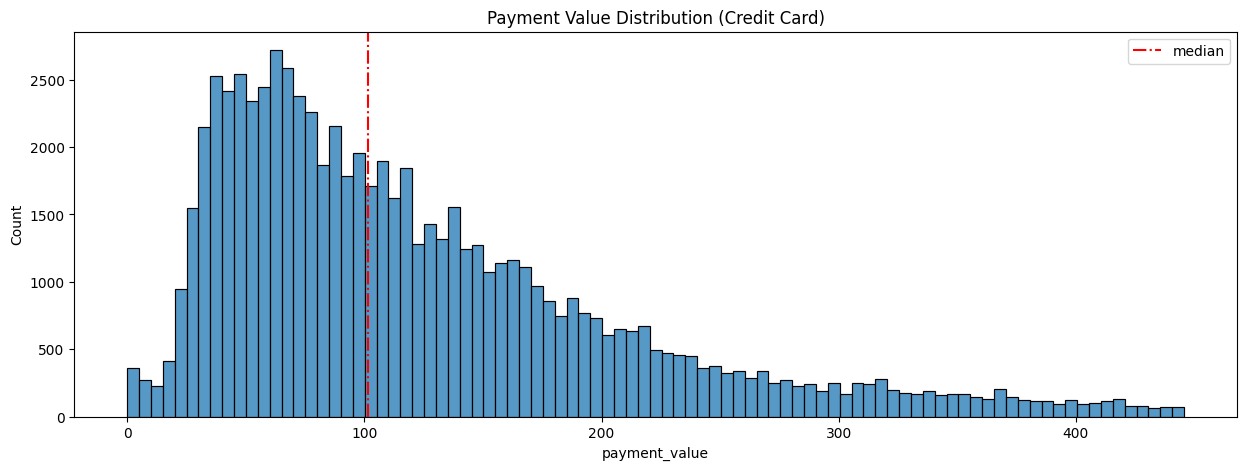

Median: 101.34


In [ ]:
# DECLARE FIGURE AND HISTOGRAM VISUALIZATION
plt.figure(figsize=(15,5))
sns.histplot(data=credit, x="payment_value")

# VERTICAL LINE
plt.axvline(credit["payment_value"].median(), color="r", linestyle="dashdot", label="median")
plt.title('Payment Value Distribution (Credit Card)')
plt.legend()

# RESULT
plt.show()

# MEDIAN VALUE
print('Median:', credit["payment_value"].median())

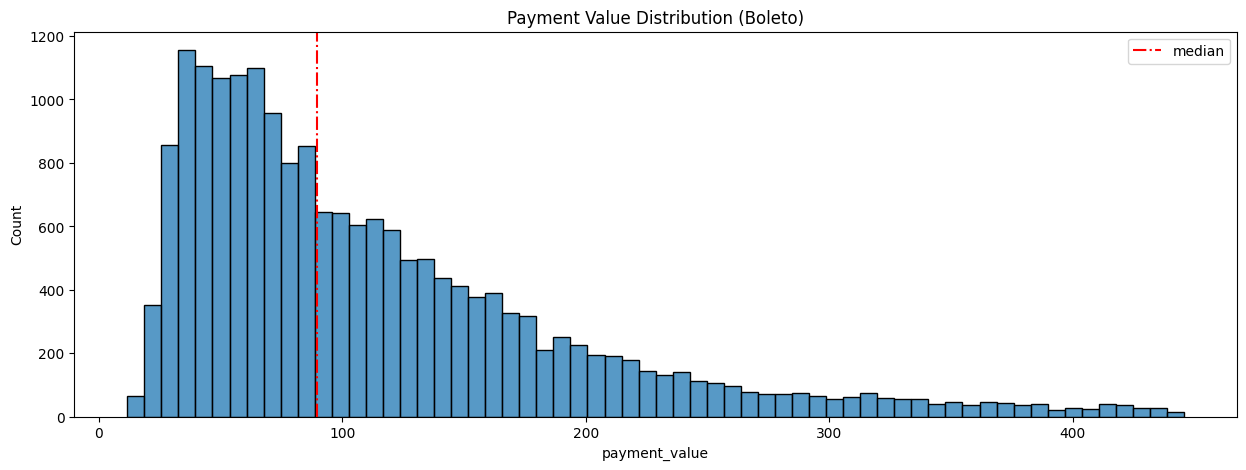

Median: 89.555


In [ ]:
# DECLARE FIGURE AND HISTOGRAM VISUALIZATION
plt.figure(figsize=(15,5))
sns.histplot(data=boleto, x="payment_value")

# VERTICAL LINE
plt.axvline(boleto["payment_value"].median(), color="r", linestyle="dashdot", label="median")
plt.title('Payment Value Distribution (Boleto)')
plt.legend()

# RESULT
plt.show()

# MEDIAN VALUE
print('Median:', boleto["payment_value"].median())

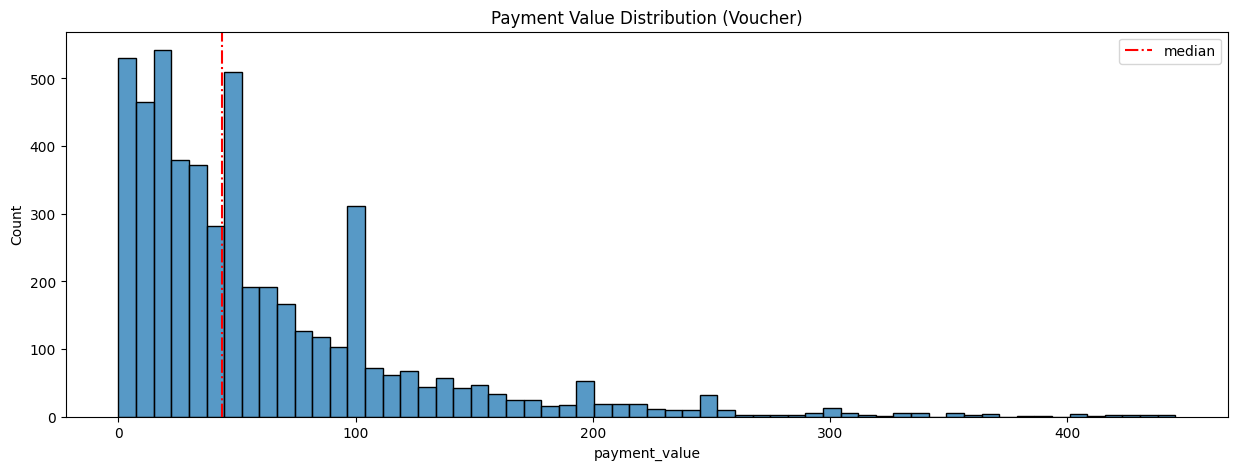

Median: 43.545


In [ ]:
# DECLARE FIGURE AND HISTOGRAM VISUALIZATION
plt.figure(figsize=(15,5))
sns.histplot(data=voucher, x="payment_value")

# VERTICAL LINE
plt.axvline(voucher["payment_value"].median(), color="r", linestyle="dashdot", label="median")
plt.title('Payment Value Distribution (Voucher)')
plt.legend()

# RESULT
plt.show()

# MEDIAN VALUE
print('Median:', voucher["payment_value"].median())

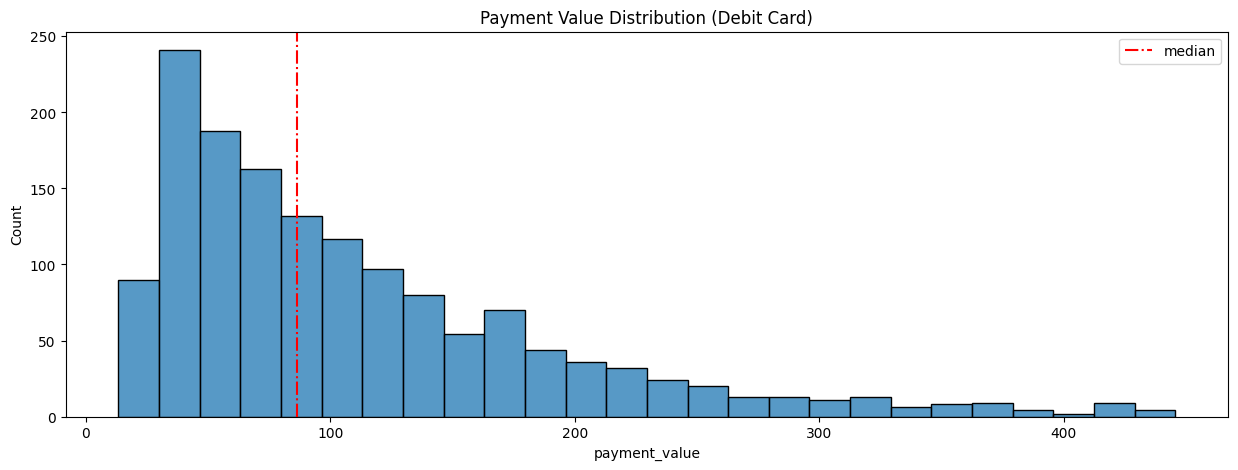

Median: 86.51


In [ ]:
# DECLARE FIGURE AND HISTOGRAM VISUALIZATION
plt.figure(figsize=(15,5))
sns.histplot(data=debit, x="payment_value")

# VERTICAL LINE
plt.axvline(debit["payment_value"].median(), color="r", linestyle="dashdot", label="median")
plt.title('Payment Value Distribution (Debit Card)')
plt.legend()

# RESULT
plt.show()

# MEDIAN VALUE
print('Median:', debit["payment_value"].median())

## **CUSTOMER TRANSACTION HABBIT**
### 1. Transaction Time


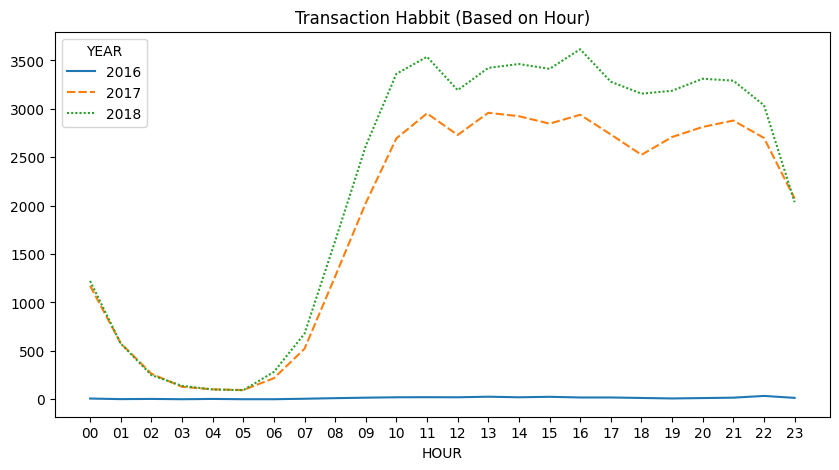

In [ ]:
# LINEPLOT VISUALIZATION
plt.figure(figsize=(10,5))
sns.lineplot(data=jam)

# Menambahkan judul
plt.title('Transaction Habbit (Based on Hour)');

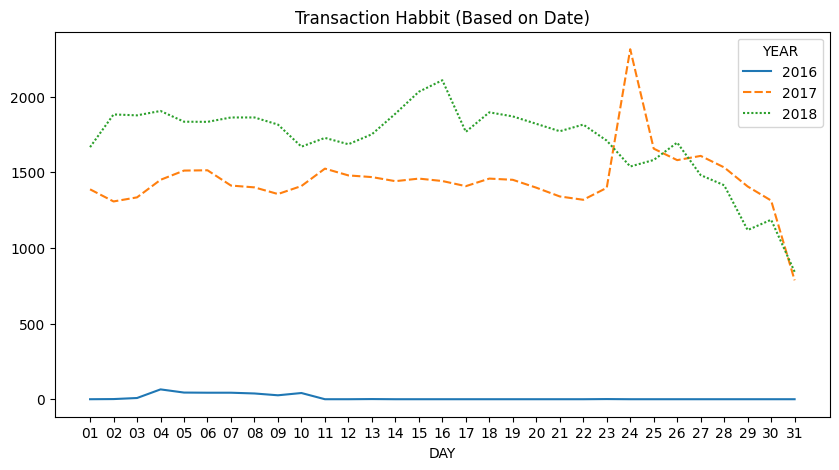

In [ ]:
# DECLARE FIGURE
plt.figure(figsize=(10,5)) 

# LINEPLOT VISUALIZATION
sns.lineplot(data=hari) 

# ADDING TITLE
plt.title('Transaction Habbit (Based on Date)'); 

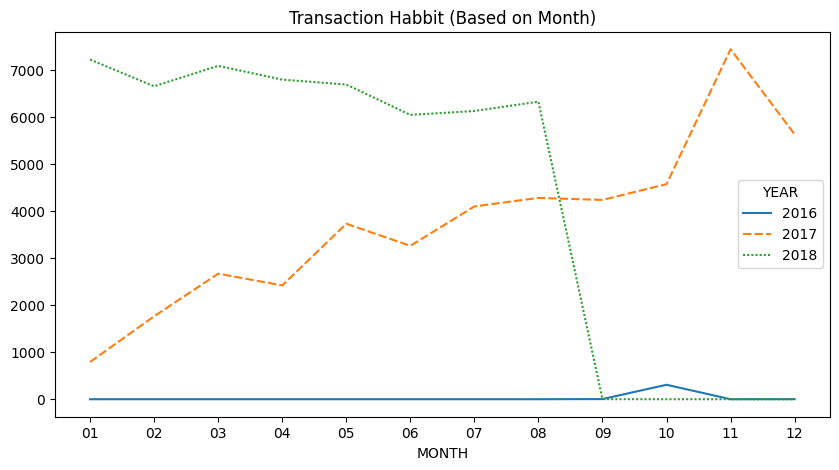

In [ ]:
# DECLARE FIGURE
plt.figure(figsize=(10,5)) 

# LINEPLOT VISUALIZATION
sns.lineplot(data=bulan) 

# ADDING TITLE
plt.title('Transaction Habbit (Based on Month)'); 

### 2. How Long Customer Do a Transaction between Purchasing Session and Approval of Purchasing Session

In [ ]:
# TIME DEVIATION COUNT
dataset_clean['selisih_waktu'] = dataset_clean['order_approved_at']-dataset_clean['order_purchase_timestamp']

# AVERAGE OF TIME DEVIATION
dataset_clean['selisih_waktu'].mean()

Timedelta('0 days 10:13:40.009147274')


### 3. Comparison of Payments Time Average (Transaction Type)

In [ ]:
# AVERAGE TIME BASED ON TRANSACTION TYPES
print('rata-rata jeda waktu (kartu kredit): ', dataset_clean.selisih_waktu[dataset_clean['payment_type']=='credit_card'].mean(),
      '\nrata-rata jeda waktu (boleto): ', dataset_clean.selisih_waktu[dataset_clean['payment_type']=='boleto'].mean(),
      '\nrata-rata jeda waktu (voucher): ', dataset_clean.selisih_waktu[dataset_clean['payment_type']=='voucher'].mean(),
      '\nrata-rata jeda waktu (kartu debit): ', dataset_clean.selisih_waktu[dataset_clean['payment_type']=='debit_card'].mean()
)

rata-rata jeda waktu (kartu kredit):  0 days 04:21:39.043577096 
rata-rata jeda waktu (boleto):  1 days 09:09:48.133720316 
rata-rata jeda waktu (voucher):  0 days 08:42:01.620245641 
rata-rata jeda waktu (kartu debit):  0 days 09:30:07.895270270
